In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import PIL

In [3]:
import numpy as np
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

import os
def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
    

In [4]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [5]:
dog_image_id = os.listdir('E:/python_work/Scraping/images/dog')[0]
dog_image = load_image(os.path.join('E:/python_work/Scraping/images/dog',dog_image_id))
print(f'shape: {dog_image.shape}')
print(f'type: {type(dog_image)}')
model.predict(dog_image)

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


array([[1.99106973e-04, 5.26710494e-07, 1.38216536e-03, 2.30216701e-05,
        2.24805681e-05, 5.68539581e-05, 3.89276192e-06, 4.92478705e-07,
        4.20679754e-07, 4.12517329e-06, 1.49197213e-03, 6.87719730e-05,
        1.18134437e-06, 1.46493257e-05, 2.58410296e-06, 8.81541291e-06,
        2.80882387e-06, 1.39731783e-05, 1.72452619e-05, 7.73014690e-05,
        1.60389561e-06, 3.37035890e-05, 3.02345541e-07, 7.63058097e-08,
        6.15488352e-06, 7.74631219e-04, 5.52931509e-04, 2.06971672e-04,
        5.79845626e-04, 2.54545262e-06, 5.31021033e-06, 1.19120778e-05,
        6.34921016e-05, 1.09572511e-05, 2.96805192e-05, 3.92149595e-05,
        3.07161594e-04, 6.45683576e-06, 1.96257308e-02, 2.26626662e-06,
        2.74217746e-06, 1.57625211e-04, 2.18861373e-06, 1.35200482e-03,
        9.89861655e-06, 3.23934319e-06, 2.48360766e-06, 2.00476916e-05,
        6.45955481e-07, 1.23610525e-05, 4.88112300e-06, 1.18276430e-05,
        4.39808682e-05, 3.69368587e-04, 1.02772092e-05, 3.717731

In [6]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [7]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [8]:
model.predict(dog_image).shape

(1, 1024)

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
x = Dropout(rate=0.4)(model.output)
x = Dense(3)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [10]:
model.summary() 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [11]:
for layer in model.layers[:-3]:
    layer.trainable = False
   

In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy'
)

In [13]:

from tensorflow.keras.applications import mobilenet as _mobilenet

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'E:/python_work/Scraping/images', 
    target_size=(256,256),
    save_to_dir= 'E:/python_work/Scraping/training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'E:/python_work/Scraping/images',
    target_size=(256,256),
    save_to_dir= 'E:/python_work/Scraping/validation_aug',
    subset='validation'
) 

Found 241 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [14]:
from keras_tqdm import TQDMNotebookCallback

batch_size = 32

history = model.fit_generator(
    generator=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 11s 2s/step - loss: 1.5934 - val_loss: 1.0130
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.8725 - val_loss: 0.4218
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.5755 - val_loss: 0.1805
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.4125 - val_loss: 0.2046
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.2513 - val_loss: 0.1532
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.2383 - val_loss: 0.2073
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.1895 - val_loss: 0.1260
Epoch 8/10
7/7 [==============================] - 9s 1s/step - loss: 0.1422 - val_loss: 0.1328
Epoch 9/10
7/7 [==============================] - 9s 1s/step - loss: 0.1486 - val_loss: 0.1625
Epoch 10/10
7/7 [==============================] - 9s 1s/step - los

In [15]:
import matplotlib.pyplot as plt


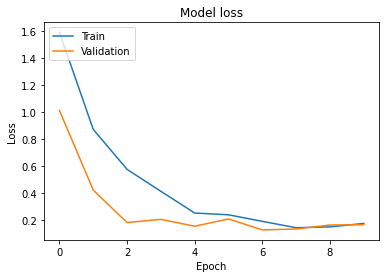

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
import random

In [18]:
random_elon_musk = random.choice(os.listdir('E:/python_work/Scraping/images/elon_musk/'))
elon_musk_path = os.path.join('E:/python_work/Scraping/images/elon_musk',random_elon_musk)
elon_musk = load_image(elon_musk_path)

random_cat = random.choice(os.listdir('E:/python_work/Scraping/images/cat/'))
cat_path = os.path.join('E:/python_work/Scraping/images/cat/',random_cat)
cat = load_image(cat_path)

random_dog = random.choice(os.listdir('E:/python_work/Scraping/images/dog/' ))
dog_path = os.path.join('E:/python_work/Scraping/images/dog',random_dog)
dog = load_image(dog_path)

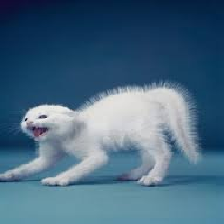

In [19]:
tf.keras.preprocessing.image.load_img(cat_path, target_size=(224,224))

In [20]:
print(f'''cat:{np.round(model.predict(cat),2)}''')

cat:[[0.93 0.06 0.01]]


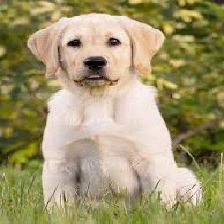

In [21]:
tf.keras.preprocessing.image.load_img(dog_path, target_size=(224,224))

In [22]:
print(f'''dog:{np.round(model.predict(dog),2)}''')

dog:[[0. 1. 0.]]


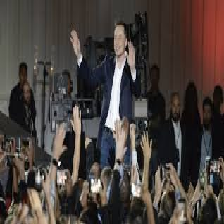

In [23]:
tf.keras.preprocessing.image.load_img(elon_musk_path, target_size=(224,224))

In [24]:
print(f'elon_musk:{np.round(model.predict(elon_musk),2)}''')

elon_musk:[[0.   0.08 0.92]]


In [25]:
ed_shreen_path = os.path.join('E:/python_work/Scraping/images/u=997228270,1638839566&fm=26&gp=0.jpg')
ed_shreen = load_image(ed_shreen_path)

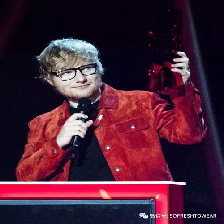

In [26]:
tf.keras.preprocessing.image.load_img(ed_shreen_path, target_size=(224,224))

In [35]:
print(f'elon_musk:{np.round(model.predict(ed_shreen),2)}''') #emmmmm.....

elon_musk:[[0.04 0.02 0.93]]


In [37]:
movie_path = os.path.join('E:/python_work/Scraping/images/1.jpg')
movie= load_image(movie_path)

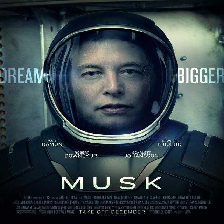

In [38]:
tf.keras.preprocessing.image.load_img(movie_path, target_size=(224,224))

In [39]:
print(f'elon_musk:{np.round(model.predict(movie),2)}''')

elon_musk:[[0.05 0.04 0.91]]


In [41]:
AHHH_path = os.path.join('E:/python_work/Scraping/images/3.png')
AHHH= load_image(AHHH_path)

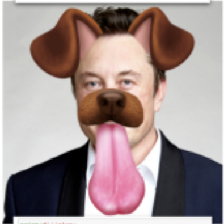

In [42]:
tf.keras.preprocessing.image.load_img(AHHH_path, target_size=(224,224))

In [44]:
print(f'elon_musk:{np.round(model.predict(AHHH),2)}''')

elon_musk:[[0.13 0.45 0.42]]
